# Best places for new businesses in Florianópolis, Brazil (North Shore)

## Introduction

### The Backgound

Brazil is known for Rio de Janeiro or São Paulo. But one of the most southern states os Brazil has a peculiar capital on an island. Or most of the capital is on this island. I'm talking about Florianópolis.

Different from the idyllic idea of an island (rounded), the "Isle of Saint Catherine" is actually...lengthy.  The north shore and the south shore are 54 km distant (approximately 33 miles).


<img src="https://sambatur.com.br/wp-content/uploads/2017/07/mapa-Florianopolis.jpg"
     alt= "The map of the Island of Saint Catherine"
     >
    

The connection of this island with the main continent is near, with bridges in only one point and almost in the center of the island. 

The center of the island is a big city, with everything a city has: big buildings, stores, traffic. But some places are very calm, allowing an "easy-going" life with beautiful beaches. 

In the summer, lots of tourists go to enjoy the beaches, transforming this calm place in a crowded happy summer space. But to establish a business in the north shore, this movement through the year means a nightmare. Sometimes, being open during summer doesn't mean being open during winter.

People who live in north shore complain about poor options for basic needs as a supermarket or a bakery. Distant from the downtown in the center of the island, this is a big problem.


### The challenge

So, I decided to analyze the Foursquare data to find what and where a new business could reach the population needs. The idea is to make a great data-driven analysis of new possibilities for business and people.


### Data and how I will solve the problem

I'll collect the data of the venues from the neighbors of Jurerê, Canasvieiras, Cachoeira do Bom Jesus, and Ponta das Canas from Foursquare. I'll categorize from the type, plotting a map to understand the different needs.

I'll cluster those venues based on the kind and proximity, to conclude what is the business that already covers a good proportion of the space in those neighbors.

I'll also cluster the neighbors, to identify those who don't have a uniform number of different venues.

In the end, I'll list the categories of venues and places that will be differential in each neighbor, as a way to help anyone who whats to start a new business.

### Who will be interested in this project?

People who want to open a new business on the north shore of Florianópolis, Brazil. 

People who live on the north shore of Florianópolis and want to know more about the options of business in the neighborhood.


### Methodology

The choice is the Quantitative Methods.

## Data

### Get geospatial infos about the places

First of all, we need to get the coordinates of the neighbors of Jurerê (divided in Jurerê East and Jurerê West), Canasvieiras, Cachoeira do Bom Jesus, and Ponta das Canas.

_I'll import the libraries as soon they seems needed, just to help the storytelling of this project._

In [1]:
!conda install -c conda-forge geocoder --yes
import geocoder # import geocoder

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [2]:
flpn=['Jurerê Leste', 'Jurerê Oeste', 'Canasvieiras', 'Cachoeira do Bom Jesus', 'Ponta das Canas']

Great! I'll make a list now to define those neighbors that will be the object of our research

I will run a function that will give me the coordinates

In [3]:
import numpy as np
import pandas as pd

In [4]:
def coord():
    n=0 
    lista=[]
    lat_lng_coords = None
    while(n<5):
        x=flpn[n]
        n+=1
        g = geocoder.arcgis('{}, Florianópolis, Brasil'.format(x))
        lat_lng_coords = g.latlng        
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
        z = latitude, longitude
        lista.append(z)
    return lista     

coord()


[(-27.440469999999948, -48.48659999999995),
 (-27.44058999999993, -48.50066999999996),
 (-27.436909999999955, -48.45805999999993),
 (-27.422439999999938, -48.43554999999998),
 (-27.406909999999982, -48.42364999999995)]

I'll turn it on a dataframe

In [5]:
flpn_df=pd.DataFrame(coord(), columns = ['Latitude', 'Longitude'])
flpn_df

,Latitude,Longitude
0,-27.44047,-48.48660
1,-27.44059,-48.50067
2,-27.43691,-48.45806
3,-27.42244,-48.43555
4,-27.40691,-48.42365


Good, but not enough. I'll need to clean and make this dataframe right to the next steps.

I must add the neighborhood to the dataframe

In [6]:
flpn_df['Neighborhood']=flpn
flpn_df

,Latitude,Longitude,Neighborhood
0,-27.44047,-48.48660,Jurerê Leste
1,-27.44059,-48.50067,Jurerê Oeste
2,-27.43691,-48.45806,Canasvieiras
3,-27.42244,-48.43555,Cachoeira do Bom Jesus
4,-27.40691,-48.42365,Ponta das Canas


And the neighborhood must be the first column

In [7]:
fixed_columns = [flpn_df.columns[-1]] + list(flpn_df.columns[:-1])
flpn_df = flpn_df[fixed_columns]
flpn_df

,Neighborhood,Latitude,Longitude
0,Jurerê Leste,-27.44047,-48.48660
1,Jurerê Oeste,-27.44059,-48.50067
2,Canasvieiras,-27.43691,-48.45806
3,Cachoeira do Bom Jesus,-27.42244,-48.43555
4,Ponta das Canas,-27.40691,-48.42365


Let's plot it just to understand if everything is ok - I know the place (is where I live), so it's easy to ensure everything is alright just seeing on the map

In [8]:
flpn_df.iloc[2, 0]

'Canasvieiras'

In [9]:
import folium

I'll set my focal point of the map - the place that are known of one of the "accesses" to the north shore of the Island of Saint Catherine

In [10]:
# Access to the north shore
latitude = -27.434759
longitude = -48.457939

In [11]:
flpn_map = folium.Map(location=[latitude, longitude], zoom_start=13)


for lat, lng, neighborhood in zip(flpn_df['Latitude'], flpn_df['Longitude'],  flpn_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(flpn_map)  
    
flpn_map

Nice! Everything seems alright. This is the time to start to colect the venues.

### Foursquare data

First of all, let's implement my access to Foursquare


In [12]:
CLIENT_ID = 'UOS5SO2GPBYR5KGDTN1DHIJ3E4AOMUBRNIHZFRLNTHUYL0K4' 
CLIENT_SECRET = 'FMZH1TDQJ5OFH51OZ5WBHNWMGAPODHT2GHDARR4LKT1MVDFF'
VERSION = '20180605'

print('My credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentials:
CLIENT_ID: UOS5SO2GPBYR5KGDTN1DHIJ3E4AOMUBRNIHZFRLNTHUYL0K4
CLIENT_SECRET:FMZH1TDQJ5OFH51OZ5WBHNWMGAPODHT2GHDARR4LKT1MVDFF



And then create the url that will give me the results of the venues of Foursquare


In [13]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
 # create URL
url_jurereleste = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    flpn_df.iloc[0, 1], 
    flpn_df.iloc[0, 2], 
    radius, 
    LIMIT)

url_jurereoeste = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    flpn_df.iloc[1, 1], 
    flpn_df.iloc[1, 2], 
    radius, 
    LIMIT)

url_canasvieiras = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    flpn_df.iloc[2, 1], 
    flpn_df.iloc[2, 2], 
    radius, 
    LIMIT)

url_cachoeira = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    flpn_df.iloc[3, 1], 
    flpn_df.iloc[3, 2], 
    radius, 
    LIMIT)

url_ponta = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    flpn_df.iloc[4, 1], 
    flpn_df.iloc[4, 2], 
    radius, 
    LIMIT)

# display URL
print(url_jurereleste)
print(url_jurereoeste)
print(url_canasvieiras)
print(url_cachoeira)
print(url_ponta)

https://api.foursquare.com/v2/venues/explore?&client_id=UOS5SO2GPBYR5KGDTN1DHIJ3E4AOMUBRNIHZFRLNTHUYL0K4&client_secret=FMZH1TDQJ5OFH51OZ5WBHNWMGAPODHT2GHDARR4LKT1MVDFF&v=20180605&ll=-27.440469999999948,-48.48659999999995&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=UOS5SO2GPBYR5KGDTN1DHIJ3E4AOMUBRNIHZFRLNTHUYL0K4&client_secret=FMZH1TDQJ5OFH51OZ5WBHNWMGAPODHT2GHDARR4LKT1MVDFF&v=20180605&ll=-27.44058999999993,-48.50066999999996&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=UOS5SO2GPBYR5KGDTN1DHIJ3E4AOMUBRNIHZFRLNTHUYL0K4&client_secret=FMZH1TDQJ5OFH51OZ5WBHNWMGAPODHT2GHDARR4LKT1MVDFF&v=20180605&ll=-27.436909999999955,-48.45805999999993&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=UOS5SO2GPBYR5KGDTN1DHIJ3E4AOMUBRNIHZFRLNTHUYL0K4&client_secret=FMZH1TDQJ5OFH51OZ5WBHNWMGAPODHT2GHDARR4LKT1MVDFF&v=20180605&ll=-27.422439999999938,-48.43554999999998&radius=1000&limit=100
https://api.foursquare.com/v2

Time to JSON! I'll get the results, but I'm not gonna print it - it's a long, long list!

In [14]:
import requests
from pandas.io.json import json_normalize 

In [15]:
results_jurereleste = requests.get(url_jurereleste).json()
results_jurereoeste = requests.get(url_jurereoeste).json()
results_canasvieiras = requests.get(url_canasvieiras).json()
results_cachoeira = requests.get(url_cachoeira).json()
results_ponta = requests.get(url_ponta).json()
print("We got results - but I'm not gonna print it because it is long!")

We got results - but I'm not gonna print it because it is long!


Run the function to normalize, clean and turn it into a beautiful pandas dataframe!

In [16]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

print("All ok here!")

All ok here!


In [17]:
venues_jurereleste = results_jurereleste['response']['groups'][0]['items']
venues_jurereoeste = results_jurereoeste['response']['groups'][0]['items']
venues_canasvieiras = results_canasvieiras['response']['groups'][0]['items']
venues_cachoeira = results_cachoeira['response']['groups'][0]['items']
venues_ponta = results_ponta['response']['groups'][0]['items']

# flatten JSON
nearby_venues_jurereleste = json_normalize(venues_jurereleste)
nearby_venues_jurereoeste = json_normalize(venues_jurereoeste)
nearby_venues_canasvieiras = json_normalize(venues_canasvieiras)
nearby_venues_cachoeira = json_normalize(venues_cachoeira)
nearby_venues_ponta = json_normalize(venues_ponta)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: pandas.io.json.json_no

Now, I'm adding the column "Neighborhood" in al thos dataframes, just to have this link

In [18]:
nearby_venues_jurereleste['Neighborhood']= 'Jurerê Leste'
nearby_venues_jurereoeste['Neighborhood']= 'Jurerê Oeste'
nearby_venues_canasvieiras['Neighborhood']= 'Canasvieiras'
nearby_venues_cachoeira['Neighborhood']= 'Cachoeira do Bom Jesus'
nearby_venues_ponta['Neighborhood']= 'Ponta das Canas'

And getting all together! 

In [19]:
nearby_venues = nearby_venues_jurereleste.append([nearby_venues_jurereoeste, nearby_venues_canasvieiras, nearby_venues_cachoeira, nearby_venues_ponta])
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.crossStreet,venue.location.postalCode,Neighborhood
0,e-0-4c4c52ad5609c9b687185d92-0,0,"[{'summary': 'This spot is popular', 'type': '...",4c4c52ad5609c9b687185d92,Praia de Jurerê,Pr. de Jurerê,-27.438671,-48.486323,"[{'label': 'display', 'lat': -27.4386711640771...",202,...,SC,Brasil,"[Pr. de Jurerê, Florianópolis, SC, Brasil]","[{'id': '4bf58dd8d48988d1e2941735', 'name': 'B...",0,[],NaN,NaN,NaN,Jurerê Leste
1,e-0-54ea1053498e6e265f2c24e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",54ea1053498e6e265f2c24e3,That's Amore,Rodovia Maurício Sirotsky Sobrinho 5845,-27.441993,-48.486875,"[{'label': 'display', 'lat': -27.4419929860082...",171,...,SC,Brasil,"[Rodovia Maurício Sirotsky Sobrinho 5845, Flor...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],121712971,NaN,NaN,Jurerê Leste
2,e-0-4cffbda21fcef04da0f3c6b9-2,0,"[{'summary': 'This spot is popular', 'type': '...",4cffbda21fcef04da0f3c6b9,Pousada dos Chás,"R. Francisco Gouvêa, 54",-27.439294,-48.484597,"[{'label': 'display', 'lat': -27.4392943026305...",237,...,SC,Brasil,"[R. Francisco Gouvêa, 54 (Renato Barbosa, 81),...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],64358947,"Renato Barbosa, 81",NaN,Jurerê Leste
3,e-0-52b318c411d28fa3970b8d32-3,0,"[{'summary': 'This spot is popular', 'type': '...",52b318c411d28fa3970b8d32,Armazém 3,"Rodovia Jorn. Maurício Sirotsky Sobrinho, 5757",-27.442586,-48.486917,"[{'label': 'display', 'lat': -27.4425856496446...",237,...,SC,Brasil,"[Rodovia Jorn. Maurício Sirotsky Sobrinho, 575...","[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",0,[],75781132,Rua das Manjubas,88053-700,Jurerê Leste
4,e-0-4b96e2e1f964a52065eb34e3-4,0,"[{'summary': 'This spot is popular', 'type': '...",4b96e2e1f964a52065eb34e3,Lucila Bistrô,"Al. César Nascimento, 322",-27.439929,-48.486687,"[{'label': 'display', 'lat': -27.4399288355895...",60,...,SC,Brasil,"[Al. César Nascimento, 322, Florianópolis, SC,...","[{'id': '4bf58dd8d48988d16b941735', 'name': 'B...",0,[],NaN,NaN,88053-500,Jurerê Leste


Some ajustments

In [20]:
# filter columns
filtered_columns = ['Neighborhood', 'venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,Neighborhood,name,categories,lat,lng
0,Jurerê Leste,Praia de Jurerê,Beach,-27.438671,-48.486323
1,Jurerê Leste,That's Amore,Ice Cream Shop,-27.441993,-48.486875
2,Jurerê Leste,Pousada dos Chás,Hotel,-27.439294,-48.484597
3,Jurerê Leste,Armazém 3,Supermarket,-27.442586,-48.486917
4,Jurerê Leste,Lucila Bistrô,Brazilian Restaurant,-27.439929,-48.486687


I noticed that we got some categories that are not relevant for this analysis. "Beach", just as an example. So, I'll see the unique categories to drop some of them that are too much for us.

In [21]:
nearby_venues['categories'].unique()

array(['Beach', 'Ice Cream Shop', 'Hotel', 'Supermarket',
       'Brazilian Restaurant', 'Bar', 'Food Truck', 'Bed & Breakfast',
       'Resort', 'Pizza Place', 'Veterinarian', 'Restaurant',
       'Southern Brazilian Restaurant', 'Pharmacy', 'Beach Bar', 'Café',
       'Butcher', 'General Entertainment', 'Seafood Restaurant',
       'Gym / Fitness Center', 'Japanese Restaurant', 'Gym',
       'Burger Joint', 'Park', 'Creperie', 'Bakery', 'Grocery Store',
       'Water Park', 'Dive Bar', 'Beer Garden', 'Snack Place',
       'Steakhouse', 'Residential Building (Apartment / Condo)',
       'Sandwich Place', 'Bistro', 'Pet Store', 'Fish & Chips Shop',
       'Coffee Shop', 'Athletics & Sports', 'Lounge', 'Dog Run',
       'Gastropub', 'Clothing Store', 'Liquor Store', 'Shopping Mall',
       'Candy Store', 'Beer Bar', 'Sushi Restaurant', 'Public Art',
       'Frozen Yogurt Shop', 'Airport Terminal', 'Playground', 'Trail',
       'Fast Food Restaurant', 'Campground', 'Gymnastics Gym',
    

I'll select those who are not useful in the analysis and I'll classify them with a good help of Lambda

In [22]:
to_drop = ['Beach', 'Resort', 'Harbor / Marina', 'Residential Building (Apartment / Condo)', 'Dog Run', 'Park', 'Public Art', 'Airport Terminal', 'Trail', 'Hotel', 'Bed & Breakfast', 'Campground', 'Plaza', 'Hostel', 'Pier', 'Lake']

nearby_venues['useful'] = nearby_venues['categories'].apply(lambda x: 1 if x in to_drop else 0)

Drop the not useful

In [23]:
nearby_venues.drop(nearby_venues.loc[nearby_venues['useful'] == 1].index, inplace=True)

And drop this column "useful" (ironically, not useful anymore!)

In [24]:
nearby_venues.drop('useful', axis=1, inplace=True)

In [25]:
nearby_venues

,Neighborhood,name,categories,lat,lng
6,Jurerê Leste,Vila Gastronômica Jurerê Food Park,Food Truck,-27.441925,-48.486719
17,Jurerê Leste,PanVel Farmácias,Pharmacy,-27.441183,-48.486775
19,Jurerê Leste,Acqua Plage,Beach Bar,-27.437981,-48.493860
26,Jurerê Leste,Supermercados Imperatriz,Supermarket,-27.445511,-48.487486
28,Jurerê Leste,Academia André Nascimento,Gym / Fitness Center,-27.443115,-48.486860
...,...,...,...,...,...
28,Cachoeira do Bom Jesus,Dande Agropecuária,Pet Store,-27.424990,-48.440150
29,Cachoeira do Bom Jesus,Soulmaki e BBQ Trucks,Food Truck,-27.418034,-48.428446
30,Cachoeira do Bom Jesus,Mercado do Sul,Market,-27.418944,-48.427471
31,Cachoeira do Bom Jesus,Franchis Meia Luas,Bakery,-27.417879,-48.426954


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

121 venues were returned by Foursquare.


Let's againg see it in a map

In [27]:
flpvenues_map = folium.Map(location=[latitude, longitude], zoom_start=13)


for lat, lng, name, categories in zip(nearby_venues['lat'], nearby_venues['lng'],  nearby_venues['name'], nearby_venues['categories']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(flpn_map)  
    
flpn_map

Now we can see better how the values are distributed. Since some of those places got an elevated number of houses and apartment buildings, it is normal to don't have space for better distribution. But it is important to understand what categories are enough in a place and scarce in others. 
It's necessary to make another distribution of the categories of venues to understand this data better. 

In [28]:
nearby_venues['categories'].unique()

array(['Food Truck', 'Pharmacy', 'Beach Bar', 'Supermarket',
       'Gym / Fitness Center', 'Japanese Restaurant',
       'Seafood Restaurant', 'Gym', 'Burger Joint', 'Ice Cream Shop',
       'Creperie', 'Bakery', 'Grocery Store', 'Water Park', 'Dive Bar',
       'Beer Garden', 'Snack Place', 'Steakhouse', 'Restaurant',
       'Sandwich Place', 'Pizza Place', 'Pet Store',
       'Brazilian Restaurant', 'Fish & Chips Shop', 'Coffee Shop',
       'Athletics & Sports', 'Liquor Store', 'General Entertainment',
       'Café', 'Lounge', 'Clothing Store', 'Sushi Restaurant',
       'Frozen Yogurt Shop', 'Playground', 'Farmers Market',
       'Comfort Food Restaurant', 'Southern Brazilian Restaurant',
       'Shoe Store', 'Nightclub', 'Food Court', 'Smoke Shop',
       'Italian Restaurant', 'Mexican Restaurant', 'Brewery',
       'Fried Chicken Joint', 'Cheese Shop', 'Lottery Retailer',
       'Fast Food Restaurant', 'Buffet', 'Pool', 'Market'], dtype=object)

Looking again to those different kinds of venues, seems reasonable to make this new class: Bar/Restaurant, Pharmacy, Entertainment, Fitness, Bakery, Nightlife, Store, Cafe/Snacks, Market, Pet, Laundry, Lottery.
<br>
<br>
It's important to say that Lottery places in Brazil are multiple: you can also pay bills and even got money (like an ATM).
<br>
<br>
Using myself as "domain expert", I could sort all this categories in classes.

In [29]:
Bar_Restaurant = ['Southern Brazilian Restaurant', 'Beach Bar', 'Seafood Restaurant', 'Japanese Restaurant', 'Burger Joint', 
                  'Dive Bar', 'Beer Garden', 'Steakhouse', 'Restaurant', 'Pizza Place', 'Bistro', 'Brazilian Restaurant', 
                  'Sushi Restaurant','Food Truck', 'Pastelaria', 'Food Court', 'Italian Restaurant', 'Mexican Restaurant',
                  'Brewery', 'Argentinian Restaurant', 'Fast Food Restaurant', 'Buffet', 'BBQ Joint', 'Fish & Chips Shop', 'Liquor Store',
                  'Comfort Food Restaurant', 'Fried Chicken Joint'
                 ]
Pharmacy = ['Pharmacy']
Entertainment = ['General Entertainment', 'Water Park','Pool', 'Video Store', 'Playground']
Fitness = ['Gym / Fitness Center', 'Gym', 'Athletics & Sports']
Bakery = ['Bakery']
Nightlife = ['Nightclub', 'Lounge']
Store = ["Clothing Store", "Men's Store", "Shoe Store", "Smoke Shop", "Convenience Store"]
Cafe_Snacks = ['Ice Cream Shop', 'Creperie', 'Snack Place', 'Sandwich Place', 'Café', 'Frozen Yogurt Shop'
              'Juice Bar', 'Coffee Shop']
Market = ['Grocery Store', 'Supermarket', 'Market', 'Farmers Market','Cheese Shop']
Pet = ['Pet Store']
Lottery = ['Lottery Retailer']

In [30]:
def classify(row):
        
    if row['categories'] in Bar_Restaurant :
                     return 'Bar/Restaurant'
    if row['categories'] in Pharmacy :
                     return 'Pharmacy'
    if row['categories'] in Entertainment:
                     return 'Entertainment'
    if row['categories'] in Fitness:
                     return 'Fitness'
    if row['categories'] in Bakery:
                     return 'Bakery'
    if row['categories'] in Nightlife:
                     return 'Nightlife'
    if row['categories'] in Store:
                     return 'Store'
    if row['categories'] in Cafe_Snacks:
                     return 'Café/Snacks'
    if row['categories'] in Market:
                     return 'Market'
    if row['categories'] in Pet:
                     return 'Pet'
    if row['categories'] in Lottery:
                     return 'Lottery'
    else: 
                     return 'Other'

In [31]:
nearby_venues['venue class']=nearby_venues.apply(classify, axis=1)
nearby_venues

,Neighborhood,name,categories,lat,lng,venue class
6,Jurerê Leste,Vila Gastronômica Jurerê Food Park,Food Truck,-27.441925,-48.486719,Bar/Restaurant
17,Jurerê Leste,PanVel Farmácias,Pharmacy,-27.441183,-48.486775,Pharmacy
19,Jurerê Leste,Acqua Plage,Beach Bar,-27.437981,-48.493860,Bar/Restaurant
26,Jurerê Leste,Supermercados Imperatriz,Supermarket,-27.445511,-48.487486,Market
28,Jurerê Leste,Academia André Nascimento,Gym / Fitness Center,-27.443115,-48.486860,Fitness
...,...,...,...,...,...,...
28,Cachoeira do Bom Jesus,Dande Agropecuária,Pet Store,-27.424990,-48.440150,Pet
29,Cachoeira do Bom Jesus,Soulmaki e BBQ Trucks,Food Truck,-27.418034,-48.428446,Bar/Restaurant
30,Cachoeira do Bom Jesus,Mercado do Sul,Market,-27.418944,-48.427471,Market
31,Cachoeira do Bom Jesus,Franchis Meia Luas,Bakery,-27.417879,-48.426954,Bakery


The dataframe deserves some clean and organization again!

In [32]:
fixed_columns = [nearby_venues.columns[-1]] + list(nearby_venues.columns[:-1])
nearby_venues = nearby_venues[fixed_columns]
nearby_venues.reset_index(drop=True, inplace=True)
nearby_venues

,venue class,Neighborhood,name,categories,lat,lng
0,Bar/Restaurant,Jurerê Leste,Vila Gastronômica Jurerê Food Park,Food Truck,-27.441925,-48.486719
1,Pharmacy,Jurerê Leste,PanVel Farmácias,Pharmacy,-27.441183,-48.486775
2,Bar/Restaurant,Jurerê Leste,Acqua Plage,Beach Bar,-27.437981,-48.493860
3,Market,Jurerê Leste,Supermercados Imperatriz,Supermarket,-27.445511,-48.487486
4,Fitness,Jurerê Leste,Academia André Nascimento,Gym / Fitness Center,-27.443115,-48.486860
...,...,...,...,...,...,...
116,Pet,Cachoeira do Bom Jesus,Dande Agropecuária,Pet Store,-27.424990,-48.440150
117,Bar/Restaurant,Cachoeira do Bom Jesus,Soulmaki e BBQ Trucks,Food Truck,-27.418034,-48.428446
118,Market,Cachoeira do Bom Jesus,Mercado do Sul,Market,-27.418944,-48.427471
119,Bakery,Cachoeira do Bom Jesus,Franchis Meia Luas,Bakery,-27.417879,-48.426954


# Analysis


This is the moment the proper analysis will begin. 

In [33]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [34]:
venuesanalysis = pd.DataFrame(columns= ['Venues', 'Neighborhood'])
venuesanalysis['Venues'] = nearby_venues['venue class']
venuesanalysis['Neighborhood'] = nearby_venues['Neighborhood']
venuesanalysis

,Venues,Neighborhood
0,Bar/Restaurant,Jurerê Leste
1,Pharmacy,Jurerê Leste
2,Bar/Restaurant,Jurerê Leste
3,Market,Jurerê Leste
4,Fitness,Jurerê Leste
...,...,...
116,Pet,Cachoeira do Bom Jesus
117,Bar/Restaurant,Cachoeira do Bom Jesus
118,Market,Cachoeira do Bom Jesus
119,Bakery,Cachoeira do Bom Jesus


I'll create another dataframe, just to manipulate this data safetely

In [35]:
venuesnumb = pd.DataFrame(venuesanalysis.pivot_table(index = ['Venues', 'Neighborhood'], aggfunc ='size'))
venuesnumb.rename(columns={0: 'Total' }, inplace=True)
venuesnumb

Total
Venues         Neighborhood                 
Bakery         Cachoeira do Bom Jesus      1
               Canasvieiras                3
               Jurerê Leste                3
               Jurerê Oeste                3
Bar/Restaurant Cachoeira do Bom Jesus      3
               Canasvieiras               27
               Jurerê Leste               15
               Jurerê Oeste               17
Café/Snacks    Canasvieiras                7
               Jurerê Leste                6
               Jurerê Oeste                5
Entertainment  Cachoeira do Bom Jesus      1
               Jurerê Leste                1
               Jurerê Oeste                2
Fitness        Jurerê Leste                4
               Jurerê Oeste                2
               Ponta das Canas             1
Lottery        Canasvieiras                1
Market         Cachoeira do Bom Jesus      2
               Canasvieiras                5
               Jurerê Leste                2
Nightlife      Canasvieiras                1
               Jurerê Oeste                1
Other          Jurerê Oeste                1
Pet            Cachoeira do Bom Jesus      1
               Jurerê Leste                1
Pharmacy       Canasvieiras                1
               Jurerê Leste                1
Store          Canasvieiras                2
               Jurerê Oeste                1

First of all, let's see it in a simple bar chart

<function matplotlib.pyplot.show(close=None, block=None)>

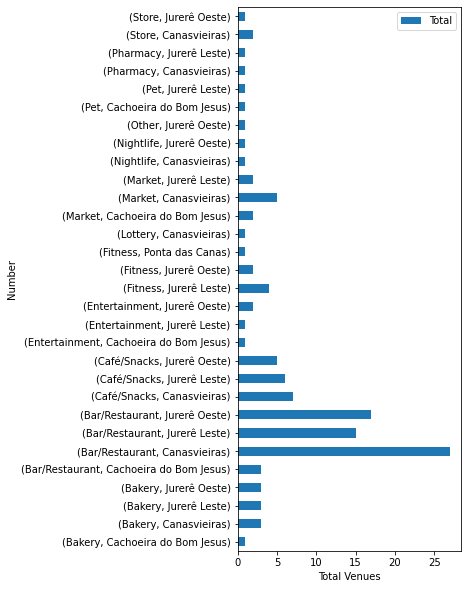

In [36]:
venuesnumb.plot(kind='barh', figsize=(4, 10))
plt.xlabel('Total Venues')
plt.ylabel('Number')
plt.show

As expected, in a place that are a destination, we got a lot of restaurants/bars. 


Let's try anothe way:

In [37]:
venuesdet = nearby_venues.groupby(['venue class', 'Neighborhood']).size().reset_index(name='Count')
venuesdet

,venue class,Neighborhood,Count
0,Bakery,Cachoeira do Bom Jesus,1
1,Bakery,Canasvieiras,3
2,Bakery,Jurerê Leste,3
3,Bakery,Jurerê Oeste,3
4,Bar/Restaurant,Cachoeira do Bom Jesus,3
5,Bar/Restaurant,Canasvieiras,27
6,Bar/Restaurant,Jurerê Leste,15
7,Bar/Restaurant,Jurerê Oeste,17
8,Café/Snacks,Canasvieiras,7
9,Café/Snacks,Jurerê Leste,6


Now, I'll analyse each neighborhood individually

In [38]:
venuesnumb2 = pd.DataFrame(venuesanalysis.pivot_table(index = ['Neighborhood', 'Venues'], aggfunc ='size'))
venuesnumb2.rename(columns={0: 'Total' }, inplace=True)
venuesnumb2

Total
Neighborhood           Venues               
Cachoeira do Bom Jesus Bakery              1
                       Bar/Restaurant      3
                       Entertainment       1
                       Market              2
                       Pet                 1
Canasvieiras           Bakery              3
                       Bar/Restaurant     27
                       Café/Snacks         7
                       Lottery             1
                       Market              5
                       Nightlife           1
                       Pharmacy            1
                       Store               2
Jurerê Leste           Bakery              3
                       Bar/Restaurant     15
                       Café/Snacks         6
                       Entertainment       1
                       Fitness             4
                       Market              2
                       Pet                 1
                       Pharmacy            1
Jurerê Oeste           Bakery              3
                       Bar/Restaurant     17
                       Café/Snacks         5
                       Entertainment       2
                       Fitness             2
                       Nightlife           1
                       Other               1
                       Store               1
Ponta das Canas        Fitness             1

In [39]:
jurereleste = pd.DataFrame(venuesnumb2.loc['Jurerê Leste'])
jurereoeste = pd.DataFrame(venuesnumb2.loc['Jurerê Oeste'])
canasvieiras = pd.DataFrame(venuesnumb2.loc['Canasvieiras'])
cachoeiradobomjesus = pd.DataFrame(venuesnumb2.loc['Cachoeira do Bom Jesus'])
pontadascanas = pd.DataFrame(venuesnumb2.loc['Ponta das Canas'])

jurereleste.reset_index(inplace=True)
jurereoeste.reset_index(inplace=True)
canasvieiras.reset_index(inplace=True)
cachoeiradobomjesus.reset_index(inplace=True)
pontadascanas.reset_index(inplace=True)


But we know that some of those neighborhood don't have all the venues classes. So, I'll normalize everything.

In [40]:
def complete(dataframename):
    x = 0
    venueclasses = ['Bakery', 'Bar/Restaurant', 'Café/Snacks', 'Entertainment','Fitness', 
                    'Lottery', 'Market', 'Nightlife', 'Other', 'Pet', 'Pharmacy', 'Store']
    
    while(x < 12):
        if venueclasses[x] in list(dataframename['Venues']):
                    print('The value {} is ok'.format(venueclasses[x]))
        else:
                print("Ops! We don't have {}".format(venueclasses[x]))    
        x+=1 

complete(jurereleste)

The value Bakery is ok
The value Bar/Restaurant is ok
The value Café/Snacks is ok
The value Entertainment is ok
The value Fitness is ok
Ops! We don't have Lottery
The value Market is ok
Ops! We don't have Nightlife
Ops! We don't have Other
The value Pet is ok
The value Pharmacy is ok
Ops! We don't have Store


In [41]:
jurereleste = jurereleste.append({'Venues':'Lottery', 'Total':0}, ignore_index=True)
jurereleste = jurereleste.append({'Venues':'Nightlife', 'Total':0}, ignore_index=True)
jurereleste = jurereleste.append({'Venues':'Store', 'Total':0}, ignore_index=True)

In [42]:
jurereleste

,Venues,Total
0,Bakery,3
1,Bar/Restaurant,15
2,Café/Snacks,6
3,Entertainment,1
4,Fitness,4
5,Market,2
6,Pet,1
7,Pharmacy,1
8,Lottery,0
9,Nightlife,0


In [43]:
complete(jurereoeste)

The value Bakery is ok
The value Bar/Restaurant is ok
The value Café/Snacks is ok
The value Entertainment is ok
The value Fitness is ok
Ops! We don't have Lottery
Ops! We don't have Market
The value Nightlife is ok
The value Other is ok
Ops! We don't have Pet
Ops! We don't have Pharmacy
The value Store is ok


In [44]:
jurereoeste = jurereoeste.append({'Venues':'Lottery', 'Total':0}, ignore_index=True)
jurereoeste = jurereoeste.append({'Venues':'Market', 'Total':0}, ignore_index=True)
jurereoeste = jurereoeste.append({'Venues':'Pet', 'Total':0}, ignore_index=True)
jurereoeste = jurereoeste.append({'Venues':'Pharmacy', 'Total':0}, ignore_index=True)
jurereoeste

,Venues,Total
0,Bakery,3
1,Bar/Restaurant,17
2,Café/Snacks,5
3,Entertainment,2
4,Fitness,2
5,Nightlife,1
6,Other,1
7,Store,1
8,Lottery,0
9,Market,0


In [45]:
complete(canasvieiras)

The value Bakery is ok
The value Bar/Restaurant is ok
The value Café/Snacks is ok
Ops! We don't have Entertainment
Ops! We don't have Fitness
The value Lottery is ok
The value Market is ok
The value Nightlife is ok
Ops! We don't have Other
Ops! We don't have Pet
The value Pharmacy is ok
The value Store is ok


In [46]:
canasvieiras=canasvieiras.append({'Venues':'Entertainment', 'Total':0}, ignore_index=True)
canasvieiras=canasvieiras.append({'Venues':'Fitness', 'Total':0}, ignore_index=True)
canasvieiras=canasvieiras.append({'Venues':'Other', 'Total':0}, ignore_index=True)
canasvieiras=canasvieiras.append({'Venues':'Pet', 'Total':0}, ignore_index=True)
canasvieiras

,Venues,Total
0,Bakery,3
1,Bar/Restaurant,27
2,Café/Snacks,7
3,Lottery,1
4,Market,5
5,Nightlife,1
6,Pharmacy,1
7,Store,2
8,Entertainment,0
9,Fitness,0


In [47]:
complete(cachoeiradobomjesus)

The value Bakery is ok
The value Bar/Restaurant is ok
Ops! We don't have Café/Snacks
The value Entertainment is ok
Ops! We don't have Fitness
Ops! We don't have Lottery
The value Market is ok
Ops! We don't have Nightlife
Ops! We don't have Other
The value Pet is ok
Ops! We don't have Pharmacy
Ops! We don't have Store


In [48]:
cachoeiradobomjesus=cachoeiradobomjesus.append({'Venues':'Café/Snacks', 'Total':0}, ignore_index=True)
cachoeiradobomjesus=cachoeiradobomjesus.append({'Venues':'Fitness', 'Total':0}, ignore_index=True)
cachoeiradobomjesus=cachoeiradobomjesus.append({'Venues':'Lottery', 'Total':0}, ignore_index=True)
cachoeiradobomjesus=cachoeiradobomjesus.append({'Venues':'Nightlife', 'Total':0}, ignore_index=True)
cachoeiradobomjesus=cachoeiradobomjesus.append({'Venues':'Other', 'Total':0}, ignore_index=True)
cachoeiradobomjesus=cachoeiradobomjesus.append({'Venues':'Pharmacy', 'Total':0}, ignore_index=True)
cachoeiradobomjesus=cachoeiradobomjesus.append({'Venues':'Store', 'Total':0}, ignore_index=True)
cachoeiradobomjesus

,Venues,Total
0,Bakery,1
1,Bar/Restaurant,3
2,Entertainment,1
3,Market,2
4,Pet,1
5,Café/Snacks,0
6,Fitness,0
7,Lottery,0
8,Nightlife,0
9,Other,0


In [49]:
complete(pontadascanas)

Ops! We don't have Bakery
Ops! We don't have Bar/Restaurant
Ops! We don't have Café/Snacks
Ops! We don't have Entertainment
The value Fitness is ok
Ops! We don't have Lottery
Ops! We don't have Market
Ops! We don't have Nightlife
Ops! We don't have Other
Ops! We don't have Pet
Ops! We don't have Pharmacy
Ops! We don't have Store


In [50]:
pontadascanas=pontadascanas.append({'Venues':'Bakery', 'Total':0}, ignore_index=True)
pontadascanas=pontadascanas.append({'Venues':'Bar/Restaurant', 'Total':0}, ignore_index=True)
pontadascanas=pontadascanas.append({'Venues':'Café/Snacks', 'Total':0}, ignore_index=True)
pontadascanas=pontadascanas.append({'Venues':'Entertainment', 'Total':0}, ignore_index=True)
pontadascanas=pontadascanas.append({'Venues':'Lottery', 'Total':0}, ignore_index=True)
pontadascanas=pontadascanas.append({'Venues':'Market', 'Total':0}, ignore_index=True)
pontadascanas=pontadascanas.append({'Venues':'Nightlife', 'Total':0}, ignore_index=True)
pontadascanas=pontadascanas.append({'Venues':'Other', 'Total':0}, ignore_index=True)
pontadascanas=pontadascanas.append({'Venues':'Pet', 'Total':0}, ignore_index=True)
pontadascanas=pontadascanas.append({'Venues':'Pharmacy', 'Total':0}, ignore_index=True)
pontadascanas=pontadascanas.append({'Venues':'Store', 'Total':0}, ignore_index=True)
pontadascanas

,Venues,Total
0,Fitness,1
1,Bakery,0
2,Bar/Restaurant,0
3,Café/Snacks,0
4,Entertainment,0
5,Lottery,0
6,Market,0
7,Nightlife,0
8,Other,0
9,Pet,0


Now you're probably thinking: "She could have done another funtion to append all those categories!"
Well, I'm a "recent programer", so it is not so easy to me...that's why I decided to just add everything manually.

But now this data "speaks": we can see in numbers how dificult can be live in a place with not so much options

With all data normalized, we can see it again in plots

# Looking closely the neighborhoods

## Jurerê Leste

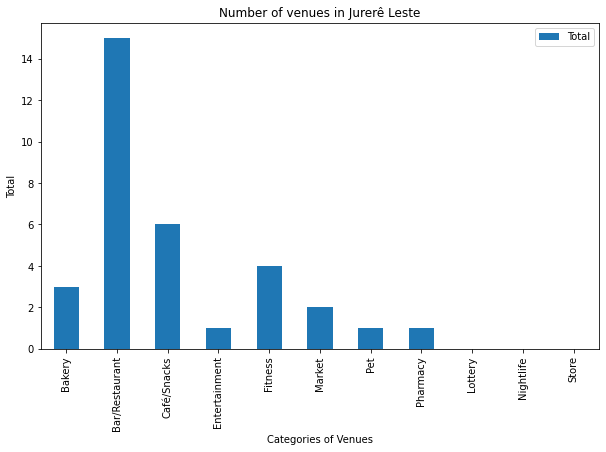

In [51]:
jurerelestex = jurereleste.set_index('Venues')
jurerelestex.plot(kind='bar', figsize=(10,6))
plt.xlabel('Categories of Venues')
plt.ylabel('Total')
plt.title('Number of venues in Jurerê Leste')
plt.show()

Jurerê Leste is known as "Traditional Jurerê" - with lots of homes, this is a place to relax.
The next neighborhood, Jurerê Oeste, is known as a "chic place", full with rich homes and some nightclubs.
But still being a tourist destination, the restaurants are the trend.

## Jurerê Oeste

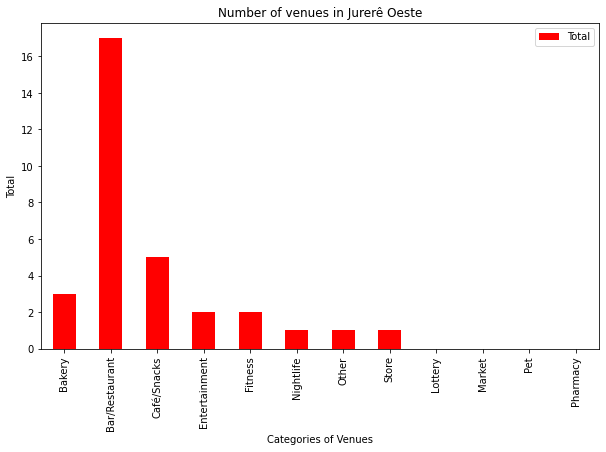

In [52]:
jurereoestex = jurereoeste.set_index('Venues')
jurereoestex.plot(kind='bar', figsize=(10,6), color='red'
                 )
plt.xlabel('Categories of Venues')
plt.ylabel('Total')
plt.title('Number of venues in Jurerê Oeste')
plt.show()

Seems the same? But is not!
Jurerê Oeste, the chic and rich neighbor, shows almost the same number of restaurants (again, tourist destination!), but you can see the rich nightlife and some stores. Almost the same, but with a clear biases showed by the kinds of venues.

## Comparing Jurerê Leste and Jurerê Oeste


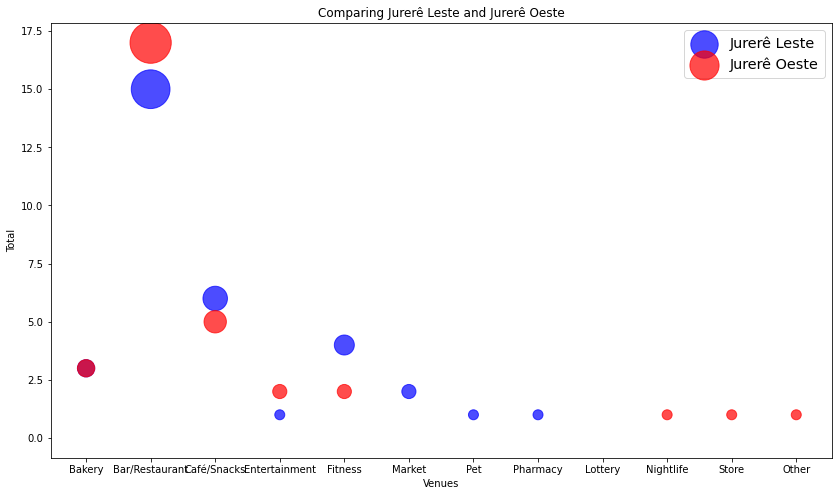

In [53]:
#Jurere Leste
ax0 = jurereleste.plot(kind='scatter',
                       x='Venues',
                       y='Total',
                       figsize=(14,8),
                       alpha=0.7,
                       color='blue',
                       s=jurereleste['Total']*100
                        )

#Jurerê Oeste
ax1 = jurereoeste.plot(kind='scatter',
                       x='Venues',
                       y='Total',
                       figsize=(14,8),
                       alpha=0.7,
                       color='red',
                       s=jurereoeste['Total']*100,
                       ax = ax0
                        )
ax0.set_title('Comparing Jurerê Leste and Jurerê Oeste')
ax0.legend(['Jurerê Leste', 'Jurerê Oeste'], loc='upper right', fontsize='x-large')

Comparing the two neighborhoods side by side, you can understand the influence of each bias (glamour or housing), but also the influence of the idea of a tourist destination.
With almost the same quantities of restaurants and cafés, we can see also some of the services needed that can be verified in one, but not in the other.
The prior completion of the analysis shows a special need for laundry and lottery. 
Even Jurerê Leste showing a lack of markets or pharmacies is natural that people who live in one neighborhood move a few kilometers to see their needs achieved.

## Canasvieiras

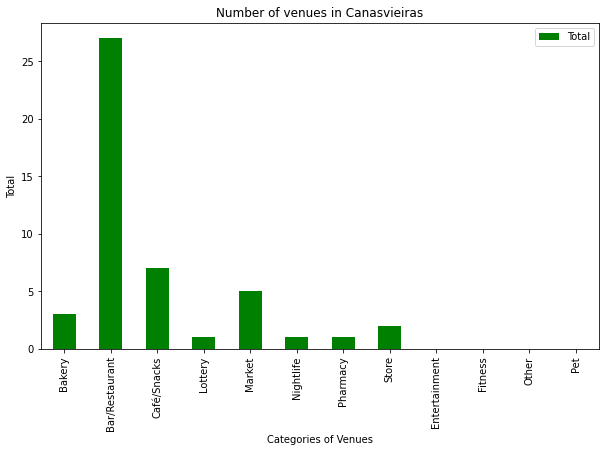

In [54]:
canasvieirasx = canasvieiras.set_index('Venues')
canasvieirasx.plot(kind='bar', figsize=(10,6), color='green'
                 )
plt.xlabel('Categories of Venues')
plt.ylabel('Total')
plt.title('Number of venues in Canasvieiras')
plt.show()

Canasvieiras is known as one of the most popular tourist destinations - especially for Argentinian and Uruguayan tourists.
This place, with apparently more options, shows the same pattern: a lot of restaurants, but with some lack of other options.
The proximity with Cachoeira Do Bom Jesus can be, for both places, a good complement.

## Cachoeira do Bom Jesus

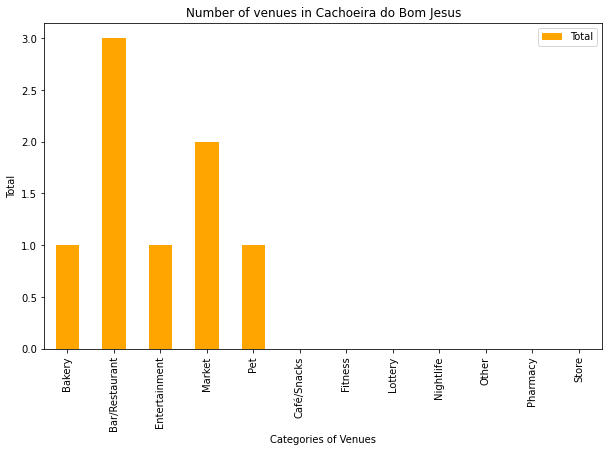

In [55]:
cachoeiradobomjesusx = cachoeiradobomjesus.set_index('Venues')
cachoeiradobomjesusx.plot(kind='bar', figsize=(10,6), color='orange'
                 )
plt.xlabel('Categories of Venues')
plt.ylabel('Total')
plt.title('Number of venues in Cachoeira do Bom Jesus')
plt.show()

Cachoeira do Bom Jesus is known by almost two avenues with business and lots of houses. This, as we could imagine, reflects in a lack of different businesses.
Again, is the restaurants the "star" of the neighborhood. A technological park ("Sapiens Park") with more than 2 thousand workers affects also the crowds of restaurants: as everyone needs a place for lunch, is natural that business people decide to open restaurants.

## Comparing Canasvieiras and Cachoeira do Bom Jesus

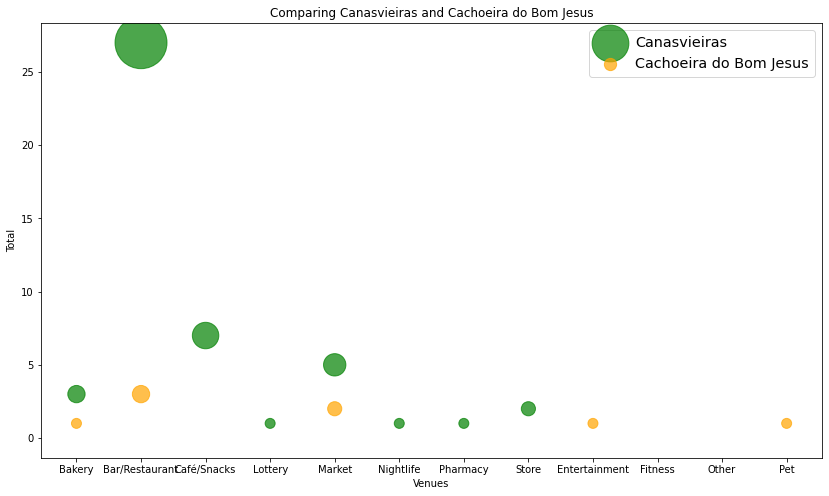

In [56]:
#Canasvieiras
ax0 = canasvieiras.plot(kind='scatter',
                       x='Venues',
                       y='Total',
                       figsize=(14,8),
                       alpha=0.7,
                       color='green',
                       s=canasvieiras['Total']*100
                        )

#Cachoeira do Bom Jesus
ax1 = cachoeiradobomjesus.plot(kind='scatter',
                       x='Venues',
                       y='Total',
                       figsize=(14,8),
                       alpha=0.7,
                       color='orange',
                       s=cachoeiradobomjesus['Total']*100,
                       ax = ax0
                        )
ax0.set_title('Comparing Canasvieiras and Cachoeira do Bom Jesus')
ax0.legend(['Canasvieiras', 'Cachoeira do Bom Jesus'], loc='upper right', fontsize='x-large')

Canasvieiras being a more "central" neighborhood shows more options. Cachoeira do Bom Jesus, the next neighborhood, have fewer options but, as the comparison with JurerêLeste-Jurerê Oeste, can take some advantages of the proximity. 
By the way, the proximity is one of the factors that complement both neighborhoods: only three kinds of venues are shared between them. 

## Ponta das Canas

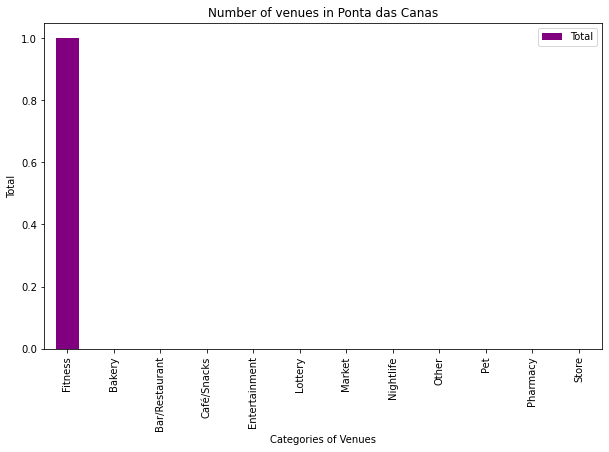

In [57]:
pontadascanasx = pontadascanas.set_index('Venues')
pontadascanasx.plot(kind='bar', figsize=(10,6), color='purple'
                 )
plt.xlabel('Categories of Venues')
plt.ylabel('Total')
plt.title('Number of venues in Ponta das Canas')
plt.show()

Ponta das Canas shows only one kind of venue: fitness.
As a continuity of the neighborhood of Cachoeira Do Bom Jesus, Ponta das Canas don't have a huge portion of territory, which could explain the lack of venues. 

## Comparing Ponta das Canas with Cachoeira do Bom Jesus

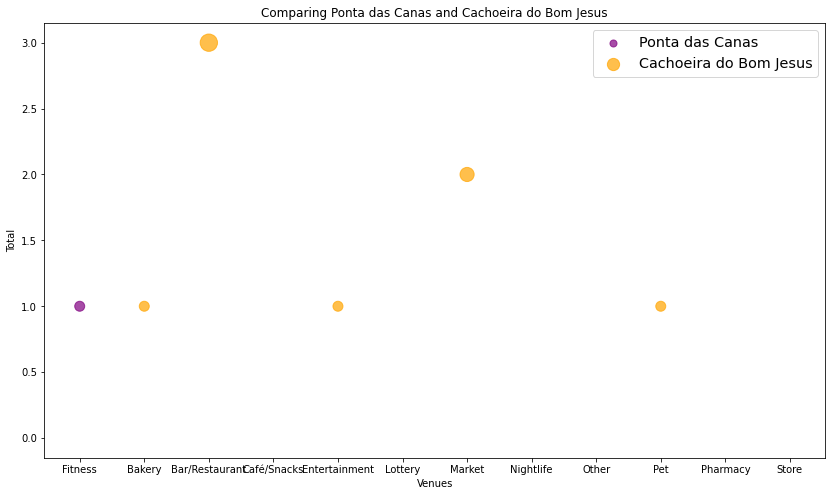

In [58]:
#Ponta das Canas
ax0 = pontadascanas.plot(kind='scatter',
                       x='Venues',
                       y='Total',
                       figsize=(14,8),
                       alpha=0.7,
                       color='purple',
                       s=pontadascanas['Total']*100
                        )

#Cachoeira do Bom Jesus
ax1 = cachoeiradobomjesus.plot(kind='scatter',
                       x='Venues',
                       y='Total',
                       figsize=(14,8),
                       alpha=0.7,
                       color='orange',
                       s=cachoeiradobomjesus['Total']*100,
                       ax = ax0
                        )
ax0.set_title('Comparing Ponta das Canas and Cachoeira do Bom Jesus')
ax0.legend(['Ponta das Canas', 'Cachoeira do Bom Jesus'], loc='upper right', fontsize='x-large')

Both residential and small neighborhoods, Ponta das Canas and Cachoeira Do Bom Jesus present a lack of businesses. It could show a dependency of Canasvieiras for some needs.

## Comparing all neighborhoods

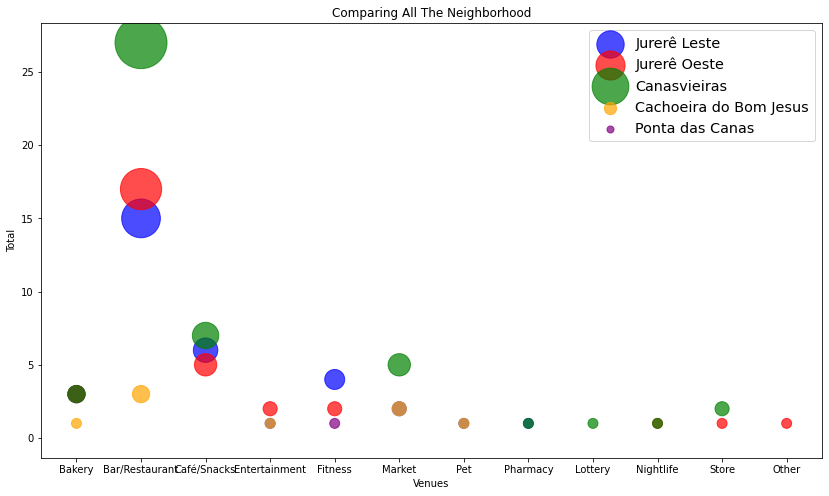

In [66]:
#Jurere Leste
ax0 = jurereleste.plot(kind='scatter',
                       x='Venues',
                       y='Total',
                       figsize=(14,8),
                       alpha=0.7,
                       color='blue',
                       s=jurereleste['Total']*100
                        )

#Jurerê Oeste
ax1 = jurereoeste.plot(kind='scatter',
                       x='Venues',
                       y='Total',
                       figsize=(14,8),
                       alpha=0.7,
                       color='red',
                       s=jurereoeste['Total']*100,
                       ax = ax0
                        )

#Canasvieiras
ax2 = canasvieiras.plot(kind='scatter',
                       x='Venues',
                       y='Total',
                       figsize=(14,8),
                       alpha=0.7,
                       color='green',
                       s=canasvieiras['Total']*100,
                       ax = ax0
                        )

#Cachoeira do Bom Jesus
ax3 = cachoeiradobomjesus.plot(kind='scatter',
                       x='Venues',
                       y='Total',
                       figsize=(14,8),
                       alpha=0.7,
                       color='orange',
                       s=cachoeiradobomjesus['Total']*100,
                       ax = ax0
                        )
#Ponta das Canas
ax4 = pontadascanas.plot(kind='scatter',
                       x='Venues',
                       y='Total',
                       figsize=(14,8),
                       alpha=0.7,
                       color='purple',
                       s=pontadascanas['Total']*100,
                       ax = ax0
                        )

ax0.set_title('Comparing All Neighborhoods')
ax0.legend(['Jurerê Leste', 'Jurerê Oeste', 'Canasvieiras', 'Cachoeira do Bom Jesus', 'Ponta das Canas'], loc='upper right', fontsize='x-large')

Even with a clear tendency to restaurants in practically all neighbors, is right to say that some of the other services could be difficult to find in a short distance.
Some of them seem even unique in all areas. This shows a decisive necessity of new business, especially for those who actually live in these neighborhoods.

# Conclusion

## About the business opportunities and needs in Florianópolis - North Shore

Based on the analyzed data, we can conclude:

1. Ponta das Canas, even being a very small neighborhood, needs many more businesses. We could only find a gym. Basic needs as markets, grocery store, pharmacies, and bakeries can be a good option in this neighborhood.

2. Enough with restaurants and bars! We know that restaurants in a place that are a tourist destination (and also have big technology companies nearby) is an obvious choice - but that is saturated already.

3. Bakeries are in a good number in the neighborhoods. But since Cachoeira do Bom Jesus just have one and Ponta das Canas have none, could be a great opportunity to open a bakery in Ponta das Canas. It would be accessible also to people who live in Cachoeira do Bom Jesus.

4. The category "Café/Snacks" is highly represented in Jurerê (both Leste and Oeste) and Canasvieiras. Even knowing that the distance from Canasvieiras to Cachoeira do Bom Jesus and Ponta das Canas are not so big, a coffee shop in those neighborhoods can represent an interesting business project.

5. The options of entertainment are poor, especially if you are thinking about a family, but the beautiful beaches are the big stars of those neighborhoods, so can be risky to invest in this kind of venue. 

6. Gyms and fitness centers are accessible in Jurerê Leste and Oeste, as in Ponta das Canas. Canasvieiras and Cachoeira do Bom Jesus are served for their neighbors, but a fitness center in the "central" part of Canasvieiras can be a good match!

7. As we already told, lotteries in Brazil represent more than just gamble. His meaning for the community, that can do easily some bank action in the lottery spaces, represents that they are very utile. Since we have just one lottery in Canasvieiras, this can be one of the best business opportunities.

8. The region of Jurerê Leste and Jurerê Oeste just have two businesses in the "market" category. It's approximately 2,58 km² (27.750.257,61 ft²) with just two markets. It's a good opportunity.

9. Nightclubs and lounge spaces are closing in the wintertime. We have only two options: one in Canasvieiras and one in Jurerê Oeste. Since this can be a risky business to open all year, it would need more data to understand if it is a good opportunity.

10. Pet shops are also scarce: with one in Cachoeira do Bom Jesus and another in Jurerê Leste, we can imagine that this "central points" could be a good place to meet the demand. But is still a good opportunity for more research and plan a new business.

11. Pharmacies are one of those businesses that everyone someday will need to reach. In Brazil, only pharmacies can sell medicine. So, having just two (one in Canasvieiras and one in Jurerê Leste) show a lack. It can be a good business opportunity - even needing a pharmacist to open one.

12. Stores can fill the necessities of everyone and make life easier for anyone who lives in the North Shore of Florianópolis. But we only could find three (two in Canasvieiras and one in Jurerê Oeste). Just this topic can be the origin of another big analysis, but shows a need for new stores and also a great business opportunity.

## About the study

The choice in the methodology field was right. The data could assist with ideas for new business, even the analysis was not profound. But Foursquare data does not seem trustworthy. 
Analyzing the data, was clear the uncertainty about the accuracy of the information. Living in one of those neighborhoods, I could remember more business than Foursquare could give me. 
It's not a bad idea to see the Foursquare data (since they are available for free). 
If I was hired for this analysis, I would try other APIs and resources to give me more information. 